In [3]:
from nilearn import datasets

netmats = datasets.fetch_megatrawls_netmats(dimensionality=300,
                                            timeseries='eigen_regression',
                                            matrices='partial_correlation')
# Partial correlation matrices array of size (300, 300) are stored in the name
# of 'correlation_matrices'
partial_correlation = netmats.correlation_matrices


Dataset created in /root/nilearn_data/Megatrawls



Downloaded 3066300 of 3066300 bytes (100.0%,    0.0s remaining) ...done. (19 seconds, 0 min)
Extracting data from /root/nilearn_data/Megatrawls/fc021b597c00f52aa526654bd4702583/Megatrawls.tgz..... done.


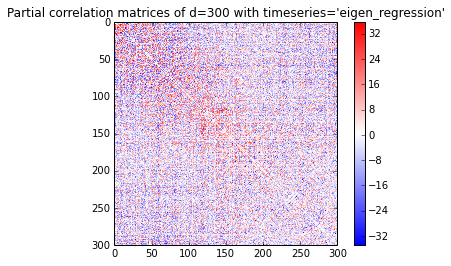

In [5]:
import matplotlib.pyplot as plt
from nilearn import plotting

%matplotlib inline

title = "Partial correlation matrices of d=300 with timeseries='eigen_regression'"
plt.figure()
plt.imshow(partial_correlation, interpolation="nearest", cmap=plotting.cm.bwr)
plt.colorbar()
plt.title(title)
plt.show()

In [6]:
from nilearn import datasets
adhd_dataset = datasets.fetch_adhd(n_subjects=1)

# print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      adhd_dataset.func[0])  # 4D data


Dataset created in /root/nilearn_data/adhd



Downloaded 3072 of 3072 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/cda7351a79e3def091c719f4a5257206/adhd40_metadata.tgz..... done.


Downloaded 44414948 of 44414948 bytes (100.0%,    0.0s remaining) ...done. (174 seconds, 2 min)
Extracting data from /root/nilearn_data/adhd/a0f27f8b6c018dd52b710db90a36baf1/adhd40_0010042.tgz...

First subject functional nifti image (4D) is at: /root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


.. done.


In [7]:
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (0, 50, -5)]
labels = [
    'Posterior Cingulate Cortex',
    'Left Temporoparietal junction',
    'Right Temporoparietal junction',
    'Medial prefrontal cortex'
]

In [8]:
from nilearn import input_data

masker = input_data.NiftiSpheresMasker(
    dmn_coords, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2.5,
    memory='nilearn_cache', memory_level=1, verbose=2)

func_filename = adhd_dataset.func[0]
confound_filename = adhd_dataset.confounds[0]

time_series = masker.fit_transform(func_filename,
                                   confounds=[confound_filename])

________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', <nilearn.input_data.nifti_spheres_masker._ExtractionFunctor object at 0x7fc7ca99aed0>, 
{ 'allow_overlap': False,
  'detrend': True,
  'high_pass': 0.01,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 8,
  'seeds': [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (0, 50, -5)],
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': 2.5}, confounds=['/root/nilearn_data/adhd/data/0010042/0010042_regressors.csv'], memory_level=1, verbose=2, memory=Memory(cachedir='nilearn_cache/joblib'))
[NiftiSpheresMasker.transform_single_imgs] Loading data from /root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
[NiftiSpheresMasker.transform_single_imgs] Extracting region signals
[NiftiSpheresMasker.transform_single_imgs] Clean

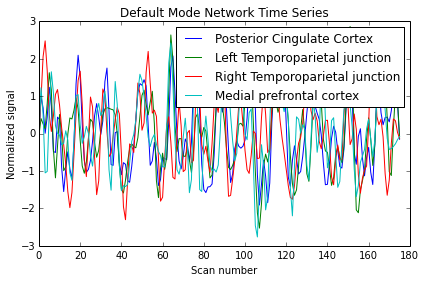

In [9]:
import matplotlib.pyplot as plt
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()